In [0]:
#https://github.com/kmsravindra/ML-AI-experiments/blob/master/AI/LSTM-time_series/LSTM%20-%20Sine%20wave%20predictor.ipynb
#https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [0]:
series = pd.read_excel('/content/veg only.xlsx', header=None )

In [351]:
series.head()

,0
0,9418.25
1,12998.90
2,12748.55
3,13755.60
4,15193.80


In [352]:
series.shape

(204, 1)

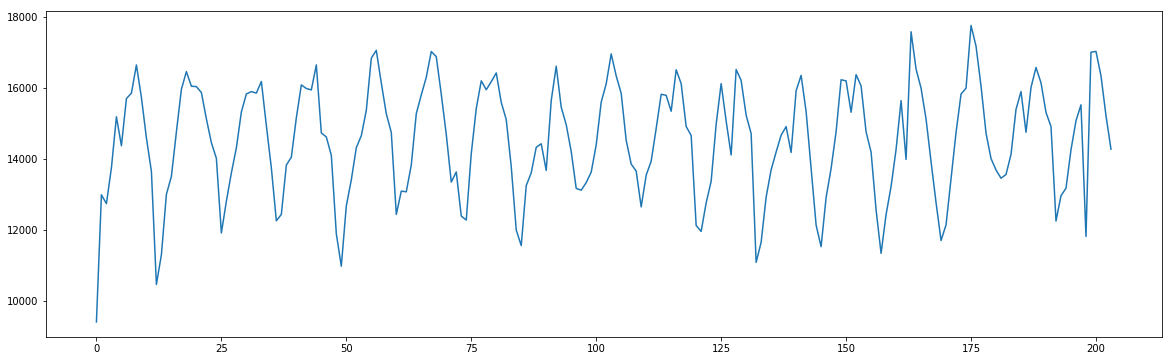

In [353]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

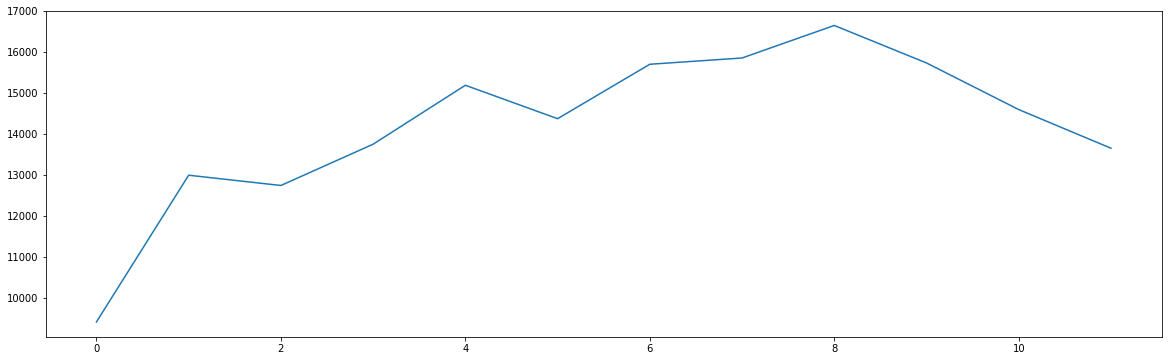

In [354]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:12])
pyplot.show()

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [0]:
window_size = 12

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [357]:

series.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-1.000000,-0.141912,-0.201908,0.039428,0.384086,0.188643,0.506869,0.543523,0.733706,0.514442,0.241928,0.015906,-0.747004
1,-0.141912,-0.201908,0.039428,0.384086,0.188643,0.506869,0.543523,0.733706,0.514442,0.241928,0.015906,-0.747004,-0.546410
2,-0.201908,0.039428,0.384086,0.188643,0.506869,0.543523,0.733706,0.514442,0.241928,0.015906,-0.747004,-0.546410,-0.139660
3,0.039428,0.384086,0.188643,0.506869,0.543523,0.733706,0.514442,0.241928,0.015906,-0.747004,-0.546410,-0.139660,-0.017572
4,0.384086,0.188643,0.506869,0.543523,0.733706,0.514442,0.241928,0.015906,-0.747004,-0.546410,-0.139660,-0.017572,0.281530


In [358]:
series.shape

(192, 13)

In [0]:

nrow = round(0.75*series.shape[0])

In [360]:
nrow

144

In [0]:

train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

In [362]:
test.shape

(48, 13)

In [0]:
from sklearn.utils import shuffle
train = shuffle(train)

In [364]:
train.shape

(144, 13)

In [0]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [0]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [367]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(48,)

In [0]:

train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [369]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(48,)

In [370]:
model = Sequential()
model.add(LSTM(input_shape = (12,1), output_dim= 12, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(40))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(12, 1), return_sequences=True, units=12)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 12, 12)            672       
_________________________________________________________________
dropout_23 (Dropout)         (None, 12, 12)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 40)                8480      
_________________________________________________________________
dropout_24 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 41        
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 9,193
Trainable params: 9,193
Non-trainable params: 0
_________________________________________________________________


In [371]:
start = time.time()
model.fit(train_X,train_y,batch_size=15,nb_epoch=100,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 5s 39ms/step - loss: 0.1710 - val_loss: 0.1579
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1382 - val_loss: 0.1690
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1331 - val_loss: 0.1727
Epoch 4/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1323 - val_loss: 0.1696
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1254 - val_loss: 0.1541
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1161 - val_loss: 0.1523
Epoch 7/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1115 - val_loss: 0.1467
Epoch 8/100
129/129 [==============================] - 0s 1ms/step - loss: 0.1031 - val_loss: 0.1365
Epoch 9/100
129/129 [==============================] - 0s 1ms/step - loss: 0.0949 - val_loss: 0.1133
Epoch 10/100
129/129 [=======================

In [0]:
preds = model.predict(test_X)

In [0]:
preds = scaler.inverse_transform(preds)

In [374]:
preds.shape

(48, 1)

In [0]:
teest=np.asmatrix(test_y)
teest
actuals = scaler.inverse_transform(teest)

In [0]:
#mean_squared_error(actuals,preds)

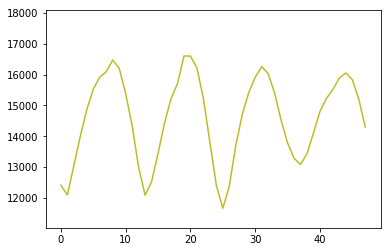

In [377]:
pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()

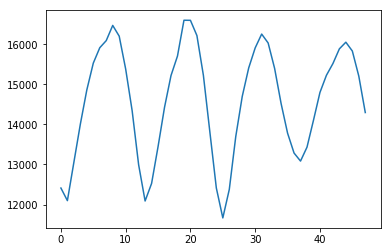

In [378]:
pyplot.plot(preds)
pyplot.show()

In [0]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
      
    preds_moving=np.asmatrix(preds_moving)
    
    preds_moving = scaler.inverse_transform(preds_moving)
    
    return preds_moving

In [380]:

preds_moving = moving_test_window_preds(98)
preds_moving

array([[12411.16  , 12093.02  , 13071.515 , 14043.167 , 14916.756 ,
        15588.68  , 15912.638 , 16094.726 , 16297.596 , 15809.019 ,
        14778.1455, 13664.084 , 12515.24  , 12372.081 , 13220.617 ,
        14142.875 , 14907.571 , 15510.705 , 15959.02  , 16234.77  ,
        16213.324 , 15653.039 , 14630.111 , 13471.993 , 12557.907 ,
        12532.549 , 13336.199 , 14215.723 , 14948.446 , 15546.072 ,
        16001.503 , 16245.92  , 16134.75  , 15517.463 , 14482.855 ,
        13356.674 , 12571.013 , 12646.436 , 13445.558 , 14299.456 ,
        15013.96  , 15597.3955, 16030.815 , 16233.292 , 16059.296 ,
        15389.93  , 14344.127 , 13256.691 , 12572.515 , 12746.673 ,
        13557.343 , 14390.221 , 15085.447 , 15649.29  , 16055.496 ,
        16215.72  , 15983.717 , 15264.294 , 14208.243 , 13160.239 ,
        12573.876 , 12846.1875, 13670.696 , 14482.487 , 15157.484 ,
        15700.499 , 16078.38  , 16195.392 , 15905.24  , 15137.081 ,
        14072.678 , 13067.126 , 12581.599 , 1294

In [381]:
actuals

array([[12575.5 , 11350.65, 12441.25, 13231.9 , 14272.35, 15648.95,
        13992.45, 17586.1 , 16536.8 , 15998.6 , 15129.95, 13928.25,
        12777.05, 11710.75, 12152.75, 13444.85, 14749.5 , 15832.  ,
        15999.4 , 17763.9 , 17180.  , 16055.7 , 14734.8 , 14017.95,
        13695.4 , 13463.8 , 13569.8 , 14136.1 , 15401.1 , 15903.6 ,
        14758.6 , 16019.8 , 16581.7 , 16149.4 , 15316.7 , 14919.6 ,
        12258.8 , 12972.2 , 13182.8 , 14264.3 , 15080.4 , 15530.3 ,
        11824.5 , 17010.6 , 17034.3 , 16347.4 , 15226.7 , 14282.1 ]])

In [0]:
predicted=[12411.16  , 12093.02  , 13071.515 , 14043.167 , 14916.756 ,
        15588.68  , 15912.638 , 16094.726 , 16297.596 , 15809.019 ,
        14778.1455, 13664.084 , 12515.24  , 12372.081 , 13220.617 ,
        14142.875 , 14907.571 , 15510.705 , 15959.02  , 16234.77  ,
        16213.324 , 15653.039 , 14630.111 , 13471.993 , 12557.907 ,
        12532.549 , 13336.199 , 14215.723 , 14948.446 , 15546.072 ,
        16001.503 , 16245.92  , 16134.75  , 15517.463 , 14482.855 ,
        13356.674 , 12571.013 , 12646.436 , 13445.558 , 14299.456 ,
        15013.96  , 15597.3955, 16030.815 , 16233.292 , 16059.296 ,
        15389.93  , 14344.127 , 13256.691 , 12572.515 , 12746.673 ,
        13557.343 , 14390.221 , 15085.447 , 15649.29  , 16055.496 ,
        16215.72  , 15983.717 , 15264.294 , 14208.243 , 13160.239 ,
        12573.876 , 12846.1875, 13670.696 , 14482.487 , 15157.484 ,
        15700.499 , 16078.38  , 16195.392 , 15905.24  , 15137.081 ,
        14072.678 , 13067.126 , 12581.599 , 12948.893 , 13783.582 ,
        14573.974 , 15228.98  , 15750.97  , 16099.53  , 16171.469 ,
        15821.957 , 15006.807 , 13937.271 , 12979.325 , 12599.056 ,
        13055.361 , 13894.85  , 14664.059 , 15299.656 , 15800.365 ,
        16118.244 , 16142.793 , 15732.737 , 14873.14  , 13802.775 ,
        12898.88  , 12627.9   , 13165.118 ]
actual=[12575.5 , 11350.65, 12441.25, 13231.9 , 14272.35, 15648.95,
        13992.45, 17586.1 , 16536.8 , 15998.6 , 15129.95, 13928.25,
        12777.05, 11710.75, 12152.75, 13444.85, 14749.5 , 15832.  ,
        15999.4 , 17763.9 , 17180.  , 16055.7 , 14734.8 , 14017.95,
        13695.4 , 13463.8 , 13569.8 , 14136.1 , 15401.1 , 15903.6 ,
        14758.6 , 16019.8 , 16581.7 , 16149.4 , 15316.7 , 14919.6 ,
        12258.8 , 12972.2 , 13182.8 , 14264.3 , 15080.4 , 15530.3 ,
        11824.5 , 17010.6 , 17034.3 , 16347.4 , 15226.7 , 14282.1 ]

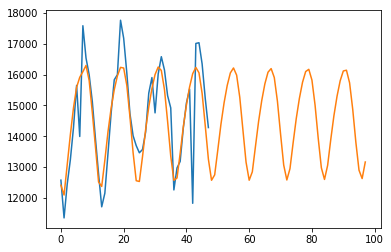

In [385]:
pyplot.plot(actual)
pyplot.plot(predicted)
pyplot.title("LSTM's Forecasting")
pyplot.xlabel('Forecasting')
pyplot.ylabel('Vegetation')
pyplot.show()